In [1]:
from PIL import Image
imagepath = 'Lenna_(test_image).png'
img = Image.open(imagepath)
img.show()


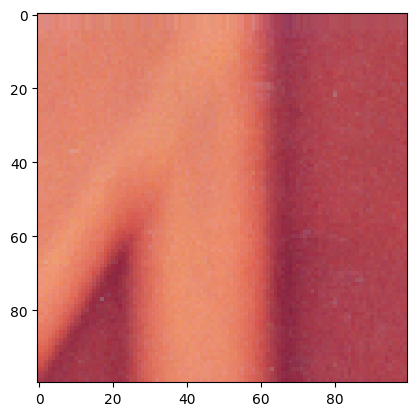

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image_path = 'Lenna_(test_image).png'
img = Image.open(image_path)
img_array = np.array(img)
topleftcorner = img_array[:100, :100]
plt.imshow(topleftcorner)
plt.show()

NameError: name 'red' is not defined

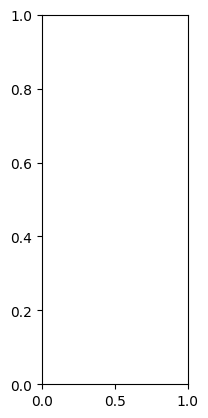

In [4]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image_path = 'Lenna_(test_image).png' 
img = Image.open(image_path)
img_array = np.array(img) 

plt.subplot(1, 3, 1)  
plt.imshow(red, cmap='Reds')
plt.title('red Channel')
plt.axis('off')  # Hide axes

plt.subplot(1, 3, 2)  
plt.imshow(green, cmap='Greens')
plt.title('green Channel')
plt.axis('off')  # Hide axes

plt.subplot(1, 3, 3)  
plt.imshow(blue, cmap='Blues')
plt.title('blue Channel')
plt.axis('off')  # Hide axes

plt.show()

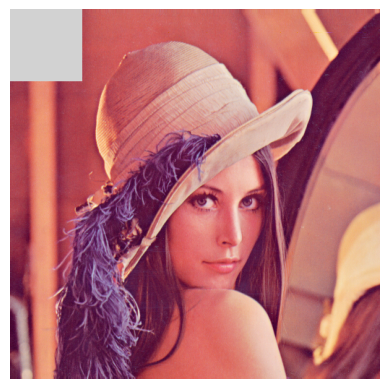

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image_path = 'Lenna_(test_image).png'  
img = Image.open(image_path)

img_array = np.array(img)

# Modify the top-left 100x100 region to have a value of 210 (light gray)
img_array[:100, :100] = [210, 210, 210]  # Set RGB values to 210 for light gray
# Convert the modified array back to an image
modified_img = Image.fromarray(img_array)

plt.imshow(modified_img)
plt.axis('off')  
plt.show()

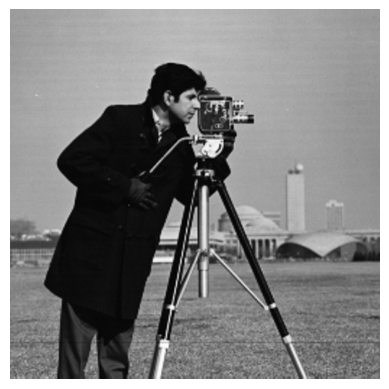

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = 'cameraman.png'  
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')  
plt.show()

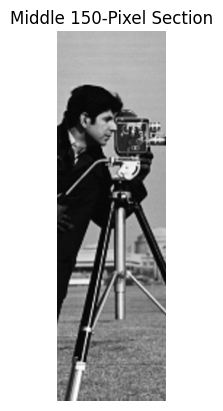

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = "cameraman.png"  
image = Image.open(image_path)


image_array = np.array(image)


height, width = image_array.shape

# Calculate the center region
start_x = (width // 2) - (150 // 2)
end_x = start_x + 150

# Extract the middle 150-pixel section
middle_section = image_array[:, start_x:end_x]

# Display the cropped image
plt.imshow(middle_section, cmap="gray")
plt.axis("off")  # Hide axis
plt.title("Middle 150-Pixel Section")
plt.show()


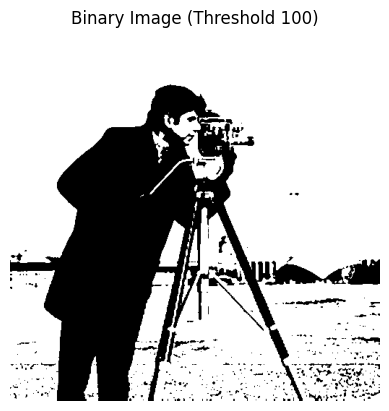

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = "cameraman.png"  
image = Image.open(image_path)

# Convert image to NumPy array
image_array = np.array(image)

# Apply threshold: set pixels < 100 to 0, and >= 100 to 255
threshold = 100
binary_image = np.where(image_array < threshold, 0, 255).astype(np.uint8)

# Display the binary image
plt.imshow(binary_image, cmap="gray")
plt.axis("off")  # Hide axis
plt.title("Binary Image (Threshold 100)")
plt.show()


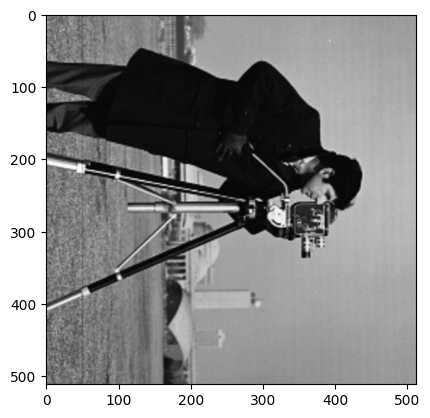

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "cameraman.png"
img = Image.open(image_path)

# Rotate the image 90 degrees clockwise
rotatedimg = img.rotate(-90)
plt.imshow(rotatedimg, cmap="gray")  
plt.show()

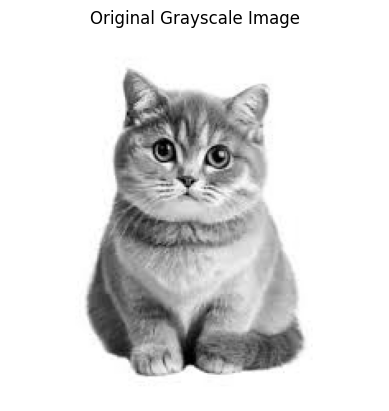

Covariance Matrix Shape: (225, 225)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and convert the image to grayscale
image_path = "cat.jpg"  
image = Image.open(image_path).convert("L")  

# Convert to NumPy array
image_array = np.array(image, dtype=np.float64)

# Step 1: Standardize the Data (Centering)
mean_pixel = np.mean(image_array, axis=0)  # Compute mean for each column
standardized_image = image_array - mean_pixel  # Center the data

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(standardized_image, rowvar=False)

# Display the original grayscale image
plt.imshow(image_array, cmap="gray")
plt.axis("off")
plt.title("Original Grayscale Image")
plt.show()

print("Covariance Matrix Shape:", cov_matrix.shape)


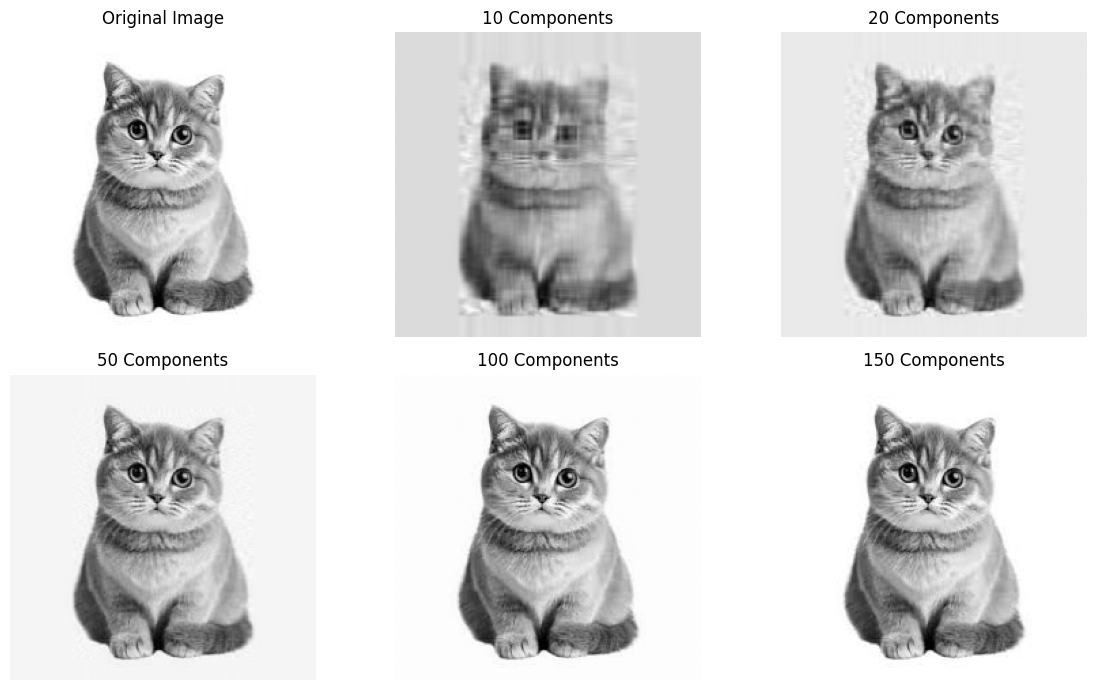

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and convert the image to grayscale
image_path = "cat.jpg"  
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert to NumPy array
image_array = np.array(image, dtype=np.float64)

# Step 1: Standardize the Data (Centering)
mean_pixel = np.mean(image_array, axis=0)  # Compute mean for each column
standardized_image = image_array - mean_pixel  # Center the data

# Step 2: Compute Covariance Matrix
cov_matrix = np.cov(standardized_image, rowvar=False)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Eigen Decomposition

# Step 4: Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]  # Get sorted indices
sorted_eigenvalues = eigenvalues[sorted_indices]  # Sort eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors

# Function to reconstruct image using top k components
def reconstruct_image(k):
    """
    Compress and reconstruct the image using the top K principal components.
    """
    # Select the top K eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :k]
    
    # Project the standardized image onto the top K principal components
    compressed_data = np.dot(standardized_image, top_eigenvectors)
    
    # Reconstruct the image from the compressed data
    reconstructed_image = np.dot(compressed_data, top_eigenvectors.T) + mean_pixel
    
    return reconstructed_image

# Define different K values (as seen in your image)
k_values = [10, 20, 50, 100, 150]
k_labels = ["10 Components", "20 Components", "50 Components", "100 Components", "150 Components"]

# Plot original vs reconstructed images
plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(k)
    
    plt.subplot(2, 3, i+2)
    plt.imshow(reconstructed, cmap="gray")
    plt.title(f"{k} Components")
    plt.axis("off")

plt.tight_layout()
plt.show()

